In [115]:
# For now, clear outputs (Cell > All Output > Clear) before committing to Git
# There might be a better way

import sqlite3
import pandas as pd
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [116]:
df = pd.read_sql_query("SELECT FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS FROM 'Fires'", cnx)
print(df.head())

   FIRE_YEAR DISCOVERY_TIME STAT_CAUSE_DESCR  CONT_DATE CONT_TIME   LATITUDE  \
0       2005           1300    Miscellaneous  2453403.5      1730  40.036944   
1       2004           0845        Lightning  2453137.5      1530  38.933056   
2       2004           1921   Debris Burning  2453156.5      2024  38.984167   
3       2004           1600        Lightning  2453189.5      1400  38.559167   
4       2004           1600        Lightning  2453189.5      1200  38.559167   

    LONGITUDE STATE  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  
0 -121.005833    CA       2453403.5       0.10               A  
1 -120.404444    CA       2453137.5       0.25               A  
2 -120.735556    CA       2453156.5       0.10               A  
3 -119.913333    CA       2453184.5       0.10               A  
4 -119.933056    CA       2453184.5       0.10               A  


In [117]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head())

   FIRE_YEAR DISCOVERY_TIME STAT_CAUSE_DESCR  CONT_DATE CONT_TIME   LATITUDE  \
0       2005           1300    Miscellaneous 2005-02-02      1730  40.036944   
1       2004           0845        Lightning 2004-05-12      1530  38.933056   
2       2004           1921   Debris Burning 2004-05-31      2024  38.984167   
3       2004           1600        Lightning 2004-07-03      1400  38.559167   
4       2004           1600        Lightning 2004-07-03      1200  38.559167   

    LONGITUDE STATE DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  
0 -121.005833    CA     2005-02-02       0.10               A  
1 -120.404444    CA     2004-05-12       0.25               A  
2 -120.735556    CA     2004-05-31       0.10               A  
3 -119.913333    CA     2004-06-28       0.10               A  
4 -119.933056    CA     2004-06-28       0.10               A  


In [118]:
df['DISCOVERY_MONTH'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).month
df['DISCOVERY_DAY'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).day
df['DISCOVERY_DAY_OF_WEEK'] = df['DISCOVERY_DATE'].dt.weekday_name

#df['CONT_DATE'].fillna(0)
df['CONT_MONTH'] = pd.DatetimeIndex(df['CONT_DATE']).month
df['CONT_DAY'] = pd.DatetimeIndex(df['CONT_DATE']).day
df['CONT_DAY_OF_WEEK'] = df['CONT_DATE'].dt.weekday_name
print(df.head())

   FIRE_YEAR DISCOVERY_TIME STAT_CAUSE_DESCR  CONT_DATE CONT_TIME   LATITUDE  \
0       2005           1300    Miscellaneous 2005-02-02      1730  40.036944   
1       2004           0845        Lightning 2004-05-12      1530  38.933056   
2       2004           1921   Debris Burning 2004-05-31      2024  38.984167   
3       2004           1600        Lightning 2004-07-03      1400  38.559167   
4       2004           1600        Lightning 2004-07-03      1200  38.559167   

    LONGITUDE STATE DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  \
0 -121.005833    CA     2005-02-02       0.10               A   
1 -120.404444    CA     2004-05-12       0.25               A   
2 -120.735556    CA     2004-05-31       0.10               A   
3 -119.913333    CA     2004-06-28       0.10               A   
4 -119.933056    CA     2004-06-28       0.10               A   

   DISCOVERY_MONTH  DISCOVERY_DAY DISCOVERY_DAY_OF_WEEK  CONT_MONTH  CONT_DAY  \
0                2              2             W

In [119]:
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DISCOVERY_DAY_OF_WEEK'] = le.fit_transform(df['DISCOVERY_DAY_OF_WEEK'])
print(df.head())

   FIRE_YEAR DISCOVERY_TIME  STAT_CAUSE_DESCR  CONT_DATE CONT_TIME   LATITUDE  \
0       2005           1300                 7 2005-02-02      1730  40.036944   
1       2004           0845                 6 2004-05-12      1530  38.933056   
2       2004           1921                 3 2004-05-31      2024  38.984167   
3       2004           1600                 6 2004-07-03      1400  38.559167   
4       2004           1600                 6 2004-07-03      1200  38.559167   

    LONGITUDE  STATE DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  \
0 -121.005833      4     2005-02-02       0.10               A   
1 -120.404444      4     2004-05-12       0.25               A   
2 -120.735556      4     2004-05-31       0.10               A   
3 -119.913333      4     2004-06-28       0.10               A   
4 -119.933056      4     2004-06-28       0.10               A   

   DISCOVERY_MONTH  DISCOVERY_DAY  DISCOVERY_DAY_OF_WEEK  CONT_MONTH  \
0                2              2           

In [120]:
df['CONT_DAY_OF_WEEK']=df['CONT_DAY_OF_WEEK'].fillna("Unknown")
df['CONT_DAY']=df['CONT_DAY'].fillna("0")
df['CONT_MONTH']=df['CONT_MONTH'].fillna("0")
df['CONT_TIME']=df['CONT_TIME'].fillna("0")
df['DISCOVERY_TIME']=df['DISCOVERY_TIME'].fillna("0")

df['CONT_DAY_OF_WEEK'] = le.fit_transform(df['CONT_DAY_OF_WEEK'])
df['FIRE_SIZE_CLASS'] = le.fit_transform(df['FIRE_SIZE_CLASS'])
print(df.head())

   FIRE_YEAR DISCOVERY_TIME  STAT_CAUSE_DESCR  CONT_DATE CONT_TIME   LATITUDE  \
0       2005           1300                 7 2005-02-02      1730  40.036944   
1       2004           0845                 6 2004-05-12      1530  38.933056   
2       2004           1921                 3 2004-05-31      2024  38.984167   
3       2004           1600                 6 2004-07-03      1400  38.559167   
4       2004           1600                 6 2004-07-03      1200  38.559167   

    LONGITUDE  STATE DISCOVERY_DATE  FIRE_SIZE  FIRE_SIZE_CLASS  \
0 -121.005833      4     2005-02-02       0.10                0   
1 -120.404444      4     2004-05-12       0.25                0   
2 -120.735556      4     2004-05-31       0.10                0   
3 -119.913333      4     2004-06-28       0.10                0   
4 -119.933056      4     2004-06-28       0.10                0   

   DISCOVERY_MONTH  DISCOVERY_DAY  DISCOVERY_DAY_OF_WEEK CONT_MONTH CONT_DAY  \
0                2            

In [121]:
df['CONT_MONTH']=df['CONT_MONTH'].astype('Float64')
df['CONT_DAY']=df['CONT_DAY'].astype('Float64')
#df['CONT_TIME']=df['CONT_TIME'].astype('Float64')
#df['DISCOVERY_DATE']=df['DISCOVERY_DATE'].astype('Float64')

In [ ]:
for item in df:
    print(item)
    print(df[item].dtype)

In [ ]:
labels=df['FIRE_SIZE_CLASS']
labels.head()

In [ ]:
logits=df.drop(['FIRE_SIZE','FIRE_SIZE_CLASS','DISCOVERY_DATE','CONT_DATE','STATE','CONT_TIME','DISCOVERY_TIME'],axis=1)
logits.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(logits,labels,test_size=0.2)

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_test,y_test)

In [ ]:
x_test.first

In [ ]:
#reg.predict(x_test[1])

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import SGD

In [ ]:
from keras.activations import relu

In [ ]:
labels_cat=keras.utils.to_categorical(labels,7)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(logits,labels_cat,test_size=0.2)

In [ ]:
labels_cat.shape

In [ ]:
model=Sequential()
model.add(BatchNormalization(input_shape=[10]))
model.add(Dense(500,kernel_initializer='truncated_normal'))
model.add(Activation('sigmoid'))
model.add(Dense(300,kernel_initializer='truncated_normal'))
model.add(Activation('sigmoid'))
model.add(Dense(7,kernel_initializer='truncated_normal'))
model.add(Activation('softmax'))

In [ ]:
model.compile(optimizer=SGD(lr=0.01, momentum=0.9,decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(np.array(x_test),np.array(y_test)))

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
a=model.predict(x_test)

In [33]:
df.head()

,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVERY_MONTH,DISCOVERY_DAY,DISCOVERY_DAY_OF_WEEK,CONT_MONTH,CONT_DAY,CONT_DAY_OF_WEEK
0,2005,1300,7,2005-02-02,1730,40.036944,-121.005833,4,2005-02-02,0.10,0,2,2,6,2.0,2.0,7
1,2004,0845,6,2004-05-12,1530,38.933056,-120.404444,4,2004-05-12,0.25,0,5,12,6,5.0,12.0,7
2,2004,1921,3,2004-05-31,2024,38.984167,-120.735556,4,2004-05-31,0.10,0,5,31,1,5.0,31.0,1
3,2004,1600,6,2004-07-03,1400,38.559167,-119.913333,4,2004-06-28,0.10,0,6,28,1,7.0,3.0,2
4,2004,1600,6,2004-07-03,1200,38.559167,-119.933056,4,2004-06-28,0.10,0,6,28,1,7.0,3.0,2


In [195]:
long2.head()

133690    -72.596689
47222     -85.731517
219826    -81.923900
141110    -84.891865
21939    -123.352640
Name: Longitude, dtype: float64

In [198]:
long2.iloc[3]

-84.891865

In [196]:
aqi.head()

,Date,AQI,Category,Defining Parameter,Defining Site,Latitude,Longitude
133690,2015-01-01,65,Moderate,PM2.5,25-011-2005,42.605816,-72.596689
47222,2015-01-01,32,Good,PM2.5,12-005-0006,30.130433,-85.731517
219826,2015-01-01,42,Good,PM2.5,39-103-0004,41.060400,-81.923900
141110,2015-01-01,32,Good,Ozone,26-113-0001,44.310555,-84.891865
21939,2015-01-01,108,Unhealthy for Sensitive Groups,PM2.5,06-045-2002,39.411740,-123.352640


In [200]:
aqi.iloc[3]

Date                   2015-01-01
AQI                            32
Category                     Good
Defining Parameter          Ozone
Defining Site         26-113-0001
Latitude                  44.3106
Longitude                -84.8919
Name: 141110, dtype: object

Main focus:
Write the algorithm, who joins the wildfire data with the airquality data over the closest latitude and longitude and the closest date

In [225]:
#just a sketch
aqi=aqi.sort_values(['Date'],axis=0)
lat=df['LATITUDE']
long=df['LONGITUDE']
dis_date=df['DISCOVERY_DATE']
measure_date=aqi['Date']
lat2=aqi['Latitude']
long2=aqi['Longitude']

for i in range(4,5):
    MinDistance=10000000000000
    MinDistanceCloumn=None

    fitting_locations=[]
    for j in range(330640): 
        Distance = ((lat.iloc[i]-lat2.iloc[j])**2 + (long.iloc[i]-long2.iloc[j])**2)**0.5  
        Distace=round(Distance,6)

        if Distance < MinDistance:
            MinDistance=Distance
            fitting_locations=[]
            fitting_locations.append(j)
            print(Distance)
        else:
            if Distance == MinDistance:
                fitting_locations.append(j)
                print(Distance)
            
    print(MinDistance)
    print(fitting_locations)

    for k in fitting_locations:
        if dis_date.iloc[i]<measure_date.astype('datetime64').iloc[k]:
            print("k gefunden")
            print(k)
            right_column=aqi.iloc[k]
            print(right_column)
            print(df.iloc[i])
            #join together
            break
    #print(len(fitting_locations))
    #a = line2.drop['LATITUDE','LONGITUDE']   #drop longitude,latitude from air_quality[line2.index]
    #s=pd.Series()    #join line and a    

47.50901987941528
24.903977444361857
6.830591080062425
0.8775372100562244
0.8589170864619455
0.8294233835672009
0.39335447163541243
0.39335447163541243
0.39335447163541243
0.39335447163541243
0.39335447163541243
0.39335447163541243
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
0.2983511751954714
[4389, 9548, 18762, 29351, 34024, 39113, 43295, 53841, 58904, 68764, 74319, 91305, 96863, 103026, 114466, 120917, 131493, 138070, 161251, 171986, 177726, 184460

In [218]:
import pandas as pd


def preprocess_site_list(site_file):
    # Make sure that state, county, and site codes are read as strings
    # instead of numbers
    col_types = {'State Code': str, 'County Code': str, 'Site Number': str}

    sites = pd.read_csv(site_file, dtype=col_types)

    # Columns that can be dropped from the site listing
    cols_to_drop = [
        'Land Use', 'Location Setting', 'Met Site State Code',
        'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
        'Met Site Distance', 'Met Site Direction', 'GMT Offset',
        'Owning Agency', 'Local Site Name', "Address", "Zip Code",
        "State Name", "County Name", "City Name", "CBSA Name", "Tribe Name",
        "Extraction Date"
    ]

    sites = sites.drop(columns=cols_to_drop)

    # Convert site closing dates to datetime64 objects (does not work
    # with read_csv())
    sites['Site Closed Date'] = pd.to_datetime(sites['Site Closed Date'])

    # Get sites that have been closed down before 1992 and drop them
    # from the list
    outdated = sites.loc[
        sites['Site Closed Date'] < pd.to_datetime('01-01-1992')]
    sites = sites.drop(outdated.index)

    # Get the complete site code, add it as a column, and finally
    # use the site code as the index
    sites['site-code'] = sites['State Code'] + '-' + sites[
        'County Code'] + '-' + sites['Site Number']
    sites = sites.set_index('site-code')

    # Divide the data into two Series: one with latitude coordinates and one
    # with longitude coordinates
    sites_lat = sites['Latitude']
    sites_lon = sites['Longitude']

    # Transform the site listings into a dictionary where keys are site
    # codes and values are coordinates}
    sites_lat = sites_lat.to_dict()
    sites_lon = sites_lon.to_dict()

    # Return the two dictionaries with the coordinates
    return sites_lat, sites_lon


def preprocess_aqi(site_file, aqi_file):
    # Read daily AQI measurements from year XXXX
    aqi = pd.read_csv(aqi_file)

    # Drop unnecessary columns
    cols_to_drop = [
        'State Name', 'State Code', 'county Name', 'County Code',
        'Number of Sites Reporting'
    ]
    aqi.drop(columns=cols_to_drop, inplace=True)

    # Get coordinate information for measurement sites
    lat_coords, lon_coords = preprocess_site_list(site_file)

    # Add column containing the site information (including location
    # coordinates) to each AQI measurement
    aqi['Latitude'] = aqi['Defining Site'].map(lat_coords)
    aqi['Longitude'] = aqi['Defining Site'].map(lon_coords)

    return aqi



aqi = preprocess_aqi('aqs_sites.csv', 'daily_aqi_by_county_2015.csv')
print(aqi.head())



         Date  AQI  Category Defining Parameter Defining Site   Latitude  \
0  2015-01-03   28      Good              PM2.5   01-003-0010  30.497478   
1  2015-01-06   48      Good              PM2.5   01-003-0010  30.497478   
2  2015-01-09   55  Moderate              PM2.5   01-003-0010  30.497478   
3  2015-01-12   41      Good              PM2.5   01-003-0010  30.497478   
4  2015-01-15   26      Good              PM2.5   01-003-0010  30.497478   

   Longitude  
0 -87.880258  
1 -87.880258  
2 -87.880258  
3 -87.880258  
4 -87.880258  


In [219]:
preprocess_aqi("aqs_sites.csv","daily_aqi_by_county_2015.csv")

,Date,AQI,Category,Defining Parameter,Defining Site,Latitude,Longitude
0,2015-01-03,28,Good,PM2.5,01-003-0010,30.497478,-87.880258
1,2015-01-06,48,Good,PM2.5,01-003-0010,30.497478,-87.880258
2,2015-01-09,55,Moderate,PM2.5,01-003-0010,30.497478,-87.880258
3,2015-01-12,41,Good,PM2.5,01-003-0010,30.497478,-87.880258
4,2015-01-15,26,Good,PM2.5,01-003-0010,30.497478,-87.880258
5,2015-01-18,29,Good,PM2.5,01-003-0010,30.497478,-87.880258
6,2015-01-21,61,Moderate,PM2.5,01-003-0010,30.497478,-87.880258
7,2015-01-24,28,Good,PM2.5,01-003-0010,30.497478,-87.880258
8,2015-01-27,28,Good,PM2.5,01-003-0010,30.497478,-87.880258
9,2015-01-30,35,Good,PM2.5,01-003-0010,30.497478,-87.880258


In [ ]:
import xgboost as xgb

In [ ]:
clf = xgb.XGBModel()

clf.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric='logloss',
        verbose=True)

ypred = clf.predict(x_test)
print(ypred)

In [ ]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

In [ ]:
df_arson = df[df['STAT_CAUSE_DESCR']=='Arson']
df_arson['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')
plt.show()

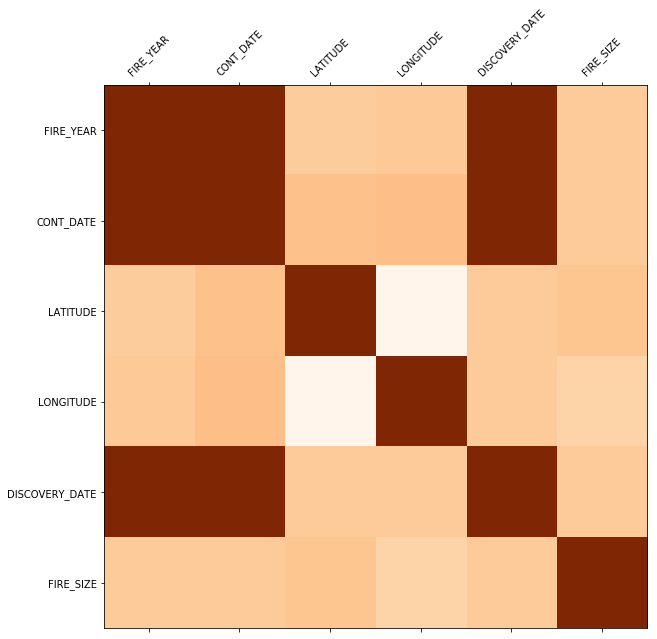

In [71]:
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()        
plot_corr(df)

In [74]:
dfplot=df

In [95]:
dfplot=dfplot.sort_index(by=['FIRE_SIZE'],axis=0, ascending=False)

/Users/Niclas/vortrag/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [103]:
dflol=dfplot[:500]

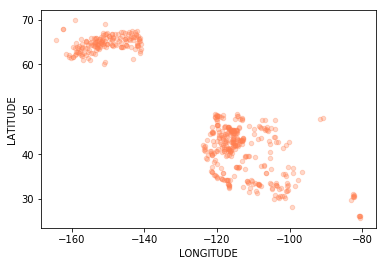

In [104]:
dflol.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='coral',alpha=0.3)
plt.show()

In [109]:
df.head()

,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVERY_MONTH,DISCOVERY_DAY,DISCOVERY_DAY_OF_WEEK,CONT_MONTH,CONT_DAY,CONT_DAY_OF_WEEK
0,2005,1300,Miscellaneous,2005-02-02,1730,40.036944,-121.005833,CA,2005-02-02,0.10,A,2,2,Wednesday,2.0,2.0,Wednesday
1,2004,0845,Lightning,2004-05-12,1530,38.933056,-120.404444,CA,2004-05-12,0.25,A,5,12,Wednesday,5.0,12.0,Wednesday
2,2004,1921,Debris Burning,2004-05-31,2024,38.984167,-120.735556,CA,2004-05-31,0.10,A,5,31,Monday,5.0,31.0,Monday
3,2004,1600,Lightning,2004-07-03,1400,38.559167,-119.913333,CA,2004-06-28,0.10,A,6,28,Monday,7.0,3.0,Saturday
4,2004,1600,Lightning,2004-07-03,1200,38.559167,-119.933056,CA,2004-06-28,0.10,A,6,28,Monday,7.0,3.0,Saturday


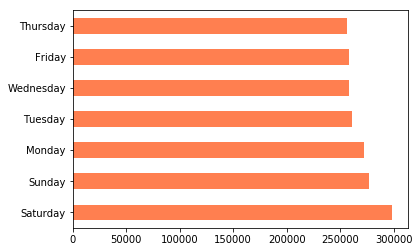

In [111]:
df_lightning = df#[df['STAT_CAUSE_DESCR']=='Lightning']
df_lightning['DISCOVERY_DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')
plt.show()

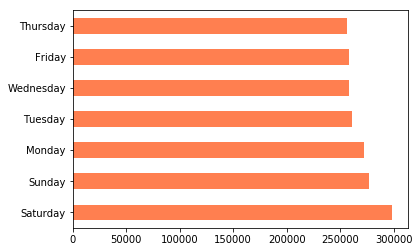

In [112]:
df['DISCOVERY_DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')
plt.show()

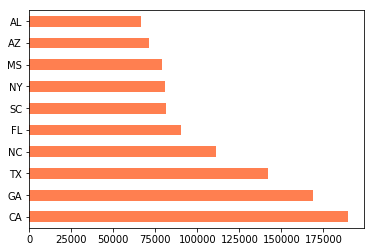

In [113]:
df['STATE'].value_counts().head(n=10).plot(kind='barh',color='coral')
plt.show()

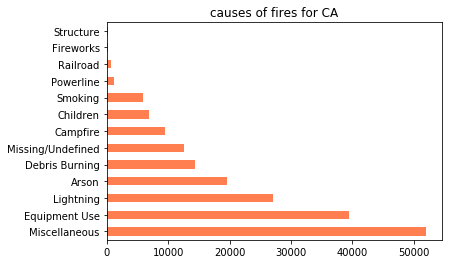

In [114]:
df_CA = df[df['STATE']=='CA']
df_CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral',title='causes of fires for CA')
plt.show()